In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath('../'))
sys.path.insert(0, os.path.abspath('../../'))
sys.path.insert(0, os.path.abspath('/home/hm-tlacherm/qlm_notebooks/notebooks_1.2.1/notebooks/master_thesis_qaoa/'))
sys.path.insert(0, os.path.abspath('/home/hm-tlacherm/qlm_notebooks/notebooks_1.2.1/notebooks/master_thesis_qaoa/ibm/'))

In [2]:
import numpy as np

import qiskit
provider = qiskit.IBMQ.load_account()
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.algorithms import QAOA
from shared.QiskitMaxcut import *
from ibm.ibm_parameters import *

from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
import networkx as nx
import numpy as np

def generate_butterfly_graph(with_weights=True):
    # Generate a graph of 5 nodes
    n = 5
    graph = nx.Graph()
    graph.add_nodes_from(np.arange(0, n, 1))
    if with_weights:
        elist = [(0, 1, 9), (0, 2, 6), (1, 2, 9), (2, 3, 10), (2, 4, 7), (3, 4, 7)]
    else:
        elist = [(0, 1, 1), (0, 2, 1), (1, 2, 1), (2, 3, 1), (2, 4, 1), (3, 4, 1)]
    graph.add_weighted_edges_from(elist)
    return graph

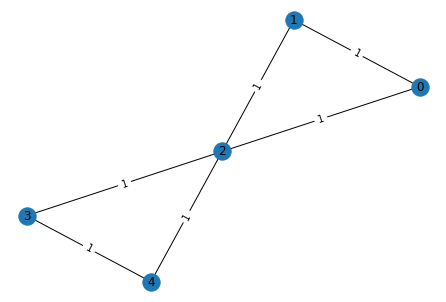

In [4]:
graph = generate_butterfly_graph(with_weights=False)
max_cut = Maxcut(graph)
max_cut_qubo = max_cut.to_qubo()
print(graph.name)
max_cut.draw()

In [5]:
step_size = 0.1
gamma_range = np.arange(0, np.pi, step_size)
beta_range = np.arange(0, np.pi, step_size)

In [6]:
g_gamma, b_beta = np.meshgrid(gamma_range, beta_range)

In [7]:
sim_landscape = np.load('landscape_final_butterfly_no_weights_results.npy', allow_pickle=True)

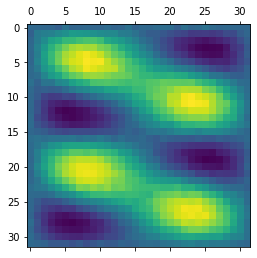

In [8]:
plt.matshow(sim_landscape)
plt.show()

In [9]:
em_landscape = np.load('/home/hm-tlacherm/qlm_notebooks/notebooks_1.2.1/notebooks/measurements/noise_model_em/master_thesis_qaoa/ibm/measurements/landscape_sydney_butterfly_no_weights_em_results_2.npy')

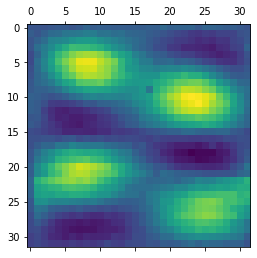

In [10]:
plt.matshow(em_landscape)
plt.show()

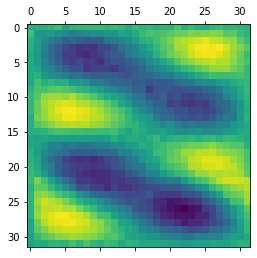

In [11]:
diff_em_landscape = em_landscape - sim_landscape 
plt.matshow(diff_em_landscape)
plt.show()

In [12]:
noise_landscape = np.load('/home/hm-tlacherm/qlm_notebooks/notebooks_1.2.1/notebooks/measurements/noise_model_gem/master_thesis_qaoa/ibm/measurements/landscape_sydney_butterfly_no_weights_results_2.npy')

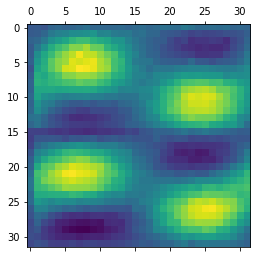

In [13]:
plt.matshow(noise_landscape)
plt.show()

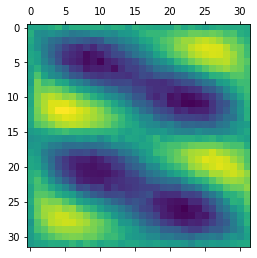

In [14]:
diff_landscape = noise_landscape - sim_landscape
plt.matshow(diff_landscape)
plt.show()

In [15]:
gem_landscape = np.load('/home/hm-tlacherm/qlm_notebooks/notebooks_1.2.1/notebooks/measurements/noise_model_gem/master_thesis_qaoa/ibm/measurements/landscape_sydney_butterfly_no_weights_gem_results_2.npy')

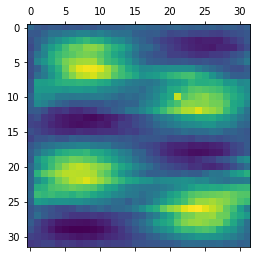

In [16]:
plt.matshow(gem_landscape)
plt.show()

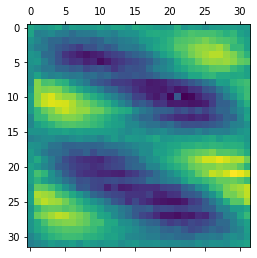

In [17]:
diff_gem_landscape = gem_landscape - sim_landscape 
plt.matshow(diff_gem_landscape)
plt.show()

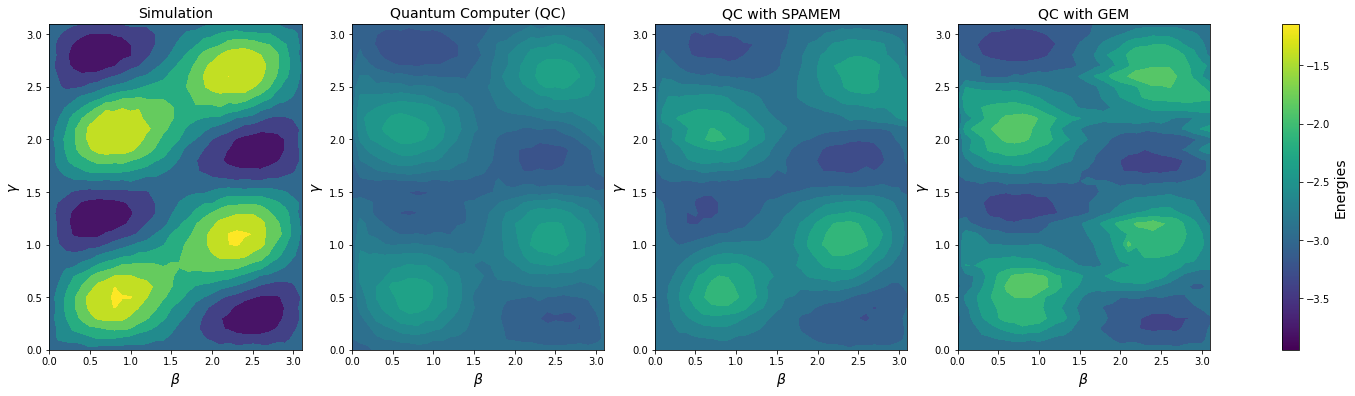

In [18]:
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import numpy as np
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
import matplotlib.cm as cm

font_size = 14
fig, ax = plt.subplots(1,4, figsize=(26,6))
#fig.set_size_inches(10, 8)
# simulation
cmap = cm.get_cmap('viridis')
#normalizer=Normalize(0,4)
#im=cm.ScalarMappable(norm=normalizer)
minv = np.min([sim_landscape, noise_landscape, em_landscape, gem_landscape])
maxv = np.max([sim_landscape, noise_landscape, em_landscape, gem_landscape])
normalizer=Normalize(minv,maxv)
im=cm.ScalarMappable(norm=normalizer)

plot = ax[0].contourf(gamma_range, beta_range, sim_landscape, cmap = cmap, norm=normalizer)
ax[0].set_xlabel(r'$\beta$', fontsize = font_size)
ax[0].set_ylabel(r'$\gamma$', fontsize = font_size)
ax[0].set_title('Simulation', fontsize = font_size)

# noise 
plot = ax[1].contourf(gamma_range, beta_range, noise_landscape, cmap = cmap, norm=normalizer)
ax[1].set_xlabel(r'$\beta$', fontsize = font_size)
ax[1].set_ylabel(r'$\gamma$', fontsize = font_size)
ax[1].set_title('Quantum Computer (QC)', fontsize = font_size)

# em
plot = ax[2].contourf(gamma_range, beta_range, em_landscape, cmap = cmap, norm=normalizer)
ax[2].set_xlabel(r'$\beta$', fontsize = font_size)
ax[2].set_ylabel(r'$\gamma$', fontsize = font_size)

ax[2].set_title('QC with SPAMEM', fontsize = font_size)

# gem 
plot = ax[3].contourf(gamma_range, beta_range, gem_landscape, cmap = cmap, norm=normalizer)
ax[3].set_xlabel(r'$\beta$', fontsize = font_size)
ax[3].set_ylabel(r'$\gamma$', fontsize = font_size)
ax[3].set_title('QC with GEM', fontsize = font_size)

colorbar = plt.colorbar(im, ax=ax)
colorbar.ax.set_ylabel('Energies', fontsize = font_size)
plt.show()

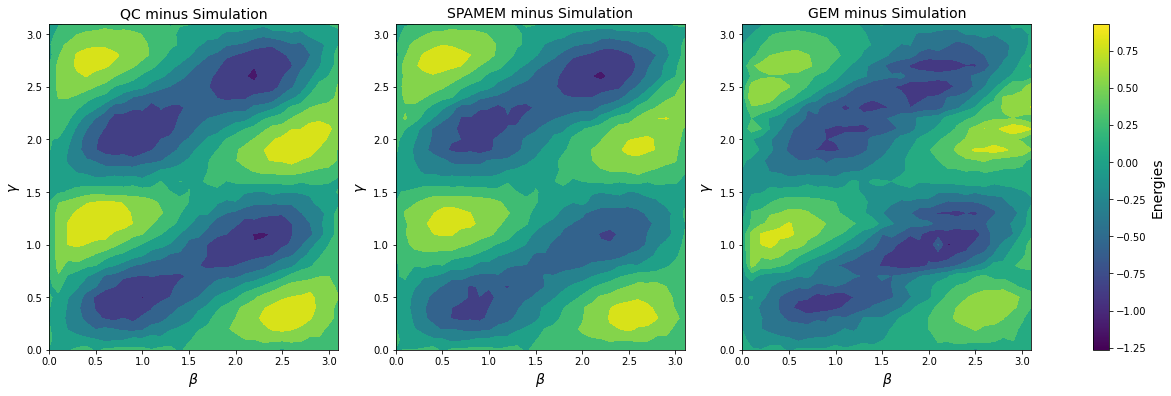

In [19]:
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import numpy as np
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
import matplotlib.cm as cm

font_size = 14
fig, ax = plt.subplots(1,3, figsize=(22,6))

# simulation
cmap = cm.get_cmap('viridis')
minv = np.min([diff_landscape, diff_gem_landscape, diff_em_landscape])
maxv = np.max([diff_landscape, diff_gem_landscape, diff_em_landscape])
normalizer=Normalize(minv,maxv)
im=cm.ScalarMappable(norm=normalizer)

# diffrenz: noise - sim  
plot = ax[0].contourf(gamma_range, beta_range, diff_landscape, cmap = cmap)
ax[0].set_xlabel(r'$\beta$', fontsize = font_size)
ax[0].set_ylabel(r'$\gamma$', fontsize = font_size)
ax[0].set_title('QC minus Simulation', fontsize = font_size)

# diffrenz: em - sim
plot = ax[1].contourf(gamma_range, beta_range, diff_em_landscape, cmap = cmap)
ax[1].set_xlabel(r'$\beta$', fontsize = font_size)
ax[1].set_ylabel(r'$\gamma$', fontsize = font_size)
ax[1].set_title('SPAMEM minus Simulation', fontsize = font_size)

# diffrenz: gem - sim  
plot = ax[2].contourf(gamma_range, beta_range, diff_gem_landscape, cmap = cmap)
ax[2].set_xlabel(r'$\beta$', fontsize = font_size)
ax[2].set_ylabel(r'$\gamma$', fontsize = font_size)
ax[2].set_title('GEM minus Simulation', fontsize = font_size)

colorbar = plt.colorbar(im, ax=ax)
colorbar.ax.set_ylabel('Energies', fontsize = font_size)
plt.show()

In [20]:
np.mean(abs(diff_landscape))

0.4558155059814453

In [21]:
np.mean(abs(diff_em_landscape))

0.4081102473901733

In [22]:
np.mean(abs(diff_gem_landscape))

0.35558988610964004

In [23]:
np.min(gem_landscape)

-3.4352927477298847

In [24]:
np.min(em_landscape)

-3.3283491268172263

In [25]:
np.min(noise_landscape)

-3.293